In [976]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

pd.options.mode.chained_assignment = None

# Read in the data

df = pd.read_csv(r'C:/Users/ADMIN/Downloads/supply_chain_data.csv')


In [977]:
# Let's look at the data

df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [978]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [979]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {:.2f}%'.format(col, pct_missing * 100))

Product type - 0.00%
SKU - 0.00%
Price - 0.00%
Availability - 0.00%
Number of products sold - 0.00%
Revenue generated - 0.00%
Customer demographics - 0.00%
Stock levels - 0.00%
Lead times - 0.00%
Order quantities - 0.00%
Shipping times - 0.00%
Shipping carriers - 0.00%
Shipping costs - 0.00%
Supplier name - 0.00%
Location - 0.00%
Lead time - 0.00%
Production volumes - 0.00%
Manufacturing lead time - 0.00%
Manufacturing costs - 0.00%
Inspection results - 0.00%
Defect rates - 0.00%
Transportation modes - 0.00%
Routes - 0.00%
Costs - 0.00%


In [980]:
# Data types for our columns

df.dtypes

Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object

In [981]:
# Drop any duplicates

df = df.drop('Lead time', axis=1)

In [982]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Supplier name,Location,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Supplier 3,Mumbai,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Supplier 3,Mumbai,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Supplier 1,Mumbai,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Supplier 5,Kolkata,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Supplier 1,Delhi,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [983]:
# Check for outliers in the numerical columns 

numerical_cols = ['Price', 'Revenue generated', 'Number of products sold', 'Stock levels', 'Order quantities', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs', 'Defect rates', 'Costs']

for col in numerical_cols:
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    outliers = df[np.abs(z_scores) > 3]
    if not outliers.empty:
        print(f"Outliers in {col}: {outliers}")

In [984]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Supplier name,Location,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Supplier 3,Mumbai,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Supplier 3,Mumbai,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Supplier 1,Mumbai,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Supplier 5,Kolkata,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Supplier 1,Delhi,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


Text(0.5, 1.0, 'Product Type')

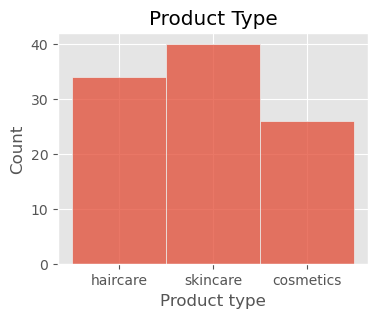

In [985]:
# Plotting to see the distrubution of product types
fig = plt.figure(figsize=(4,3))
sns.histplot(data=df,x='Product type')
plt.title('Product Type')

<Axes: xlabel='Price', ylabel='Count'>

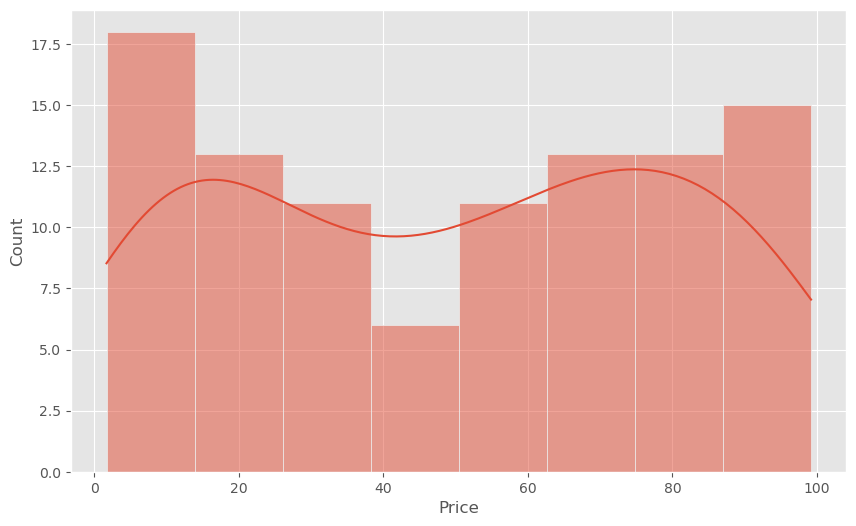

In [986]:
# Viewing the histogram of the price columns

sns.histplot(data=df,x='Price',kde=True)

<Axes: xlabel='Price', ylabel='Number of products sold'>

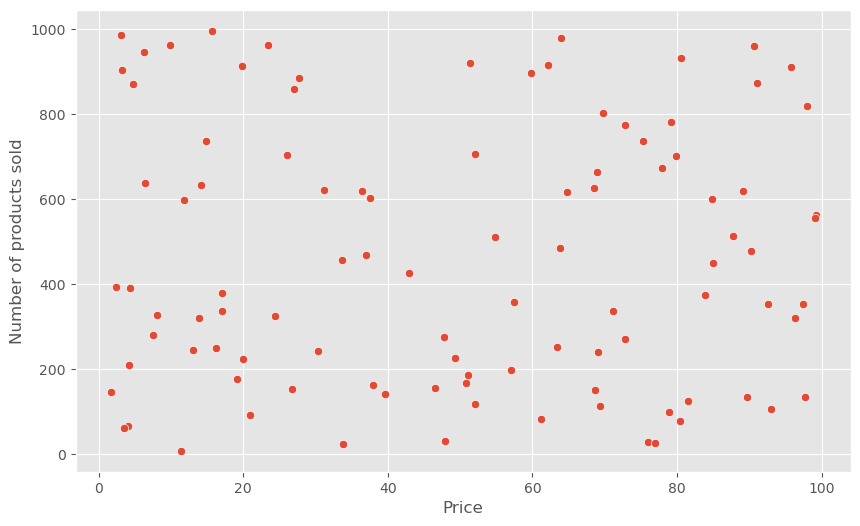

In [987]:
# Making a scatter plot of the price and the number of products sold to see if there is a correlation
sns.scatterplot(data=df,x='Price',y='Number of products sold')

In [988]:
# Checking the descriptive statistics of the product type based on the price
df.groupby('Product type').describe()['Price']

,count,mean,std,min,25%,50%,75%,max
Product type,,,,,,,,
cosmetics,26.0,57.361058,30.423912,2.397275,44.147347,64.311917,80.821379,97.760086
haircare,34.0,46.014279,28.850845,1.699976,26.796123,48.588874,69.678712,97.446947
skincare,40.0,47.259329,33.337844,4.078333,17.033205,37.228419,82.344926,99.171329


<Axes: xlabel='Price', ylabel='Product type'>

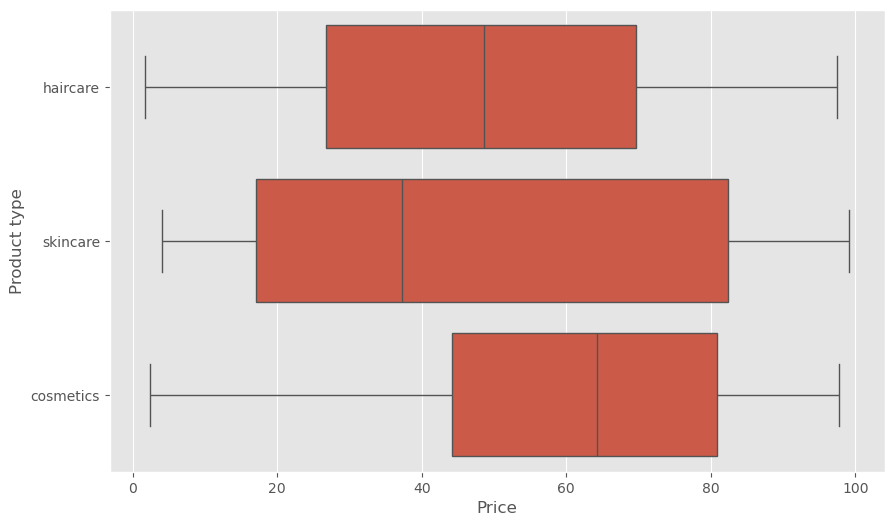

In [989]:
# Boxplot of the price and the product type
sns.boxplot(data=df,x='Price',y='Product type')

<Axes: xlabel='Location', ylabel='Count'>

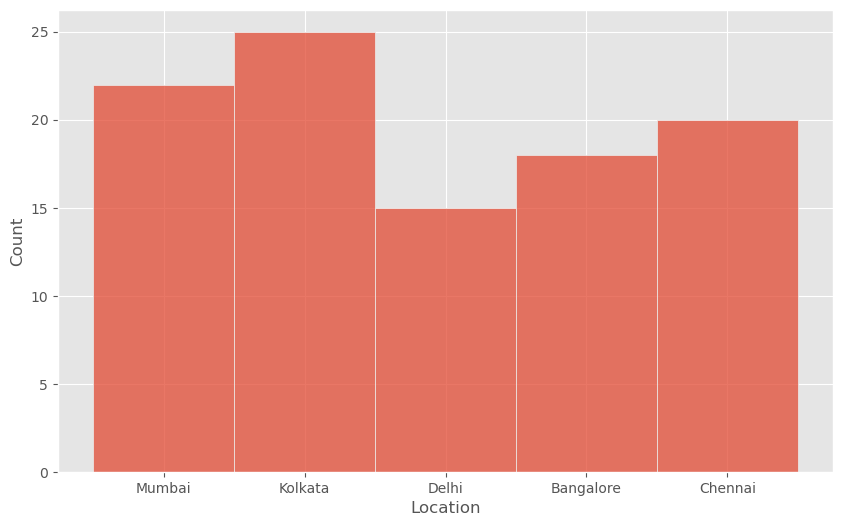

In [990]:
# Making histogram of the location of stores
sns.histplot(data=df,x='Location')

Text(0.5, 1.0, 'Price of product type in Locations')

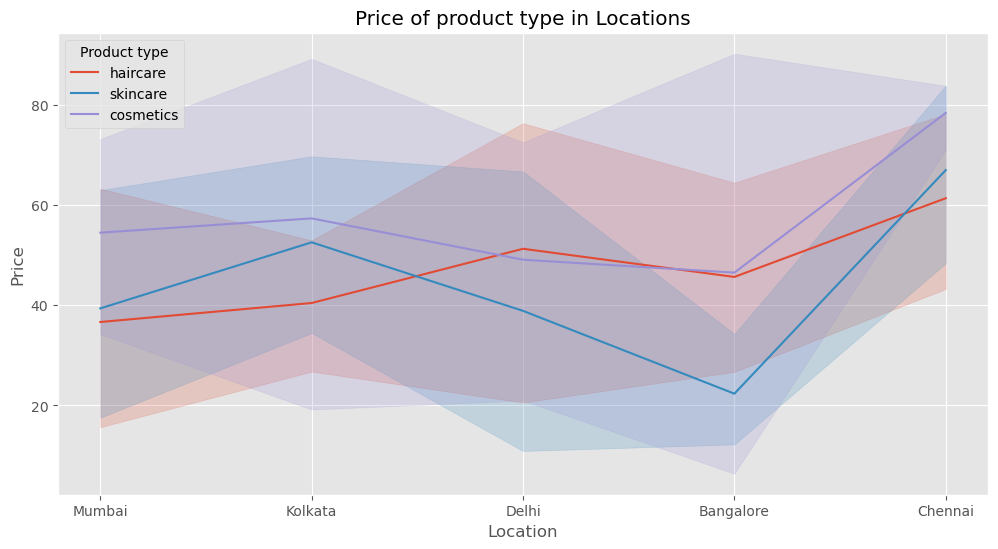

In [991]:
# Making a lineplot of the price of each product type at each store location
plt.figure(figsize=(12,6))
sns.lineplot(data=df,y='Price',x='Location',hue='Product type')
plt.title('Price of product type in Locations')

In [992]:
df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Supplier name,Location,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
Product type,1.000000,-0.039568,-0.039568,-0.039458,-0.058691,-0.039568,-0.170939,0.033238,0.041663,-0.015303,...,-0.052353,-0.061652,-0.068078,0.025001,-0.039568,0.059278,-0.039568,0.141431,-0.065739,-0.039568
SKU,-0.039568,1.000000,1.000000,0.759281,0.938121,1.000000,0.137852,0.610910,0.598781,0.534526,...,0.047535,0.058718,0.974875,0.355954,1.000000,0.080442,1.000000,0.112695,0.026785,1.000000
Price,-0.039568,1.000000,1.000000,0.759281,0.938121,1.000000,0.137852,0.610910,0.598781,0.534526,...,0.047535,0.058718,0.974875,0.355954,1.000000,0.080442,1.000000,0.112695,0.026785,1.000000
Availability,-0.039458,0.759281,0.759281,1.000000,0.701293,0.759281,0.171218,0.446701,0.439480,0.346020,...,0.058675,0.001698,0.727967,0.290864,0.759281,0.123455,0.759281,0.048853,-0.033472,0.759281
Number of products sold,-0.058691,0.938121,0.938121,0.701293,1.000000,0.938121,0.157403,0.588934,0.549949,0.559762,...,0.052347,0.080855,0.910403,0.329920,0.938121,0.081574,0.938121,0.125570,0.068473,0.938121
Revenue generated,-0.039568,1.000000,1.000000,0.759281,0.938121,1.000000,0.137852,0.610910,0.598781,0.534526,...,0.047535,0.058718,0.974875,0.355954,1.000000,0.080442,1.000000,0.112695,0.026785,1.000000
Customer demographics,-0.170939,0.137852,0.137852,0.171218,0.157403,0.137852,1.000000,0.010410,0.130586,0.043641,...,0.267646,0.009742,0.121845,0.051391,0.137852,-0.120685,0.137852,0.127693,0.052707,0.137852
Stock levels,0.033238,0.610910,0.610910,0.446701,0.588934,0.610910,0.010410,1.000000,0.436332,0.200846,...,0.129805,0.113569,0.633398,0.199059,0.610910,0.159790,0.610910,0.044878,0.023240,0.610910
Lead times,0.041663,0.598781,0.598781,0.439480,0.549949,0.598781,0.130586,0.436332,1.000000,0.415910,...,0.058278,-0.032166,0.613676,0.204619,0.598781,0.030325,0.598781,0.059059,0.051909,0.598781
Order quantities,-0.015303,0.534526,0.534526,0.346020,0.559762,0.534526,0.043641,0.200846,0.415910,1.000000,...,-0.080929,-0.097369,0.501744,0.181980,0.534526,-0.028045,0.534526,0.113253,0.131153,0.534526


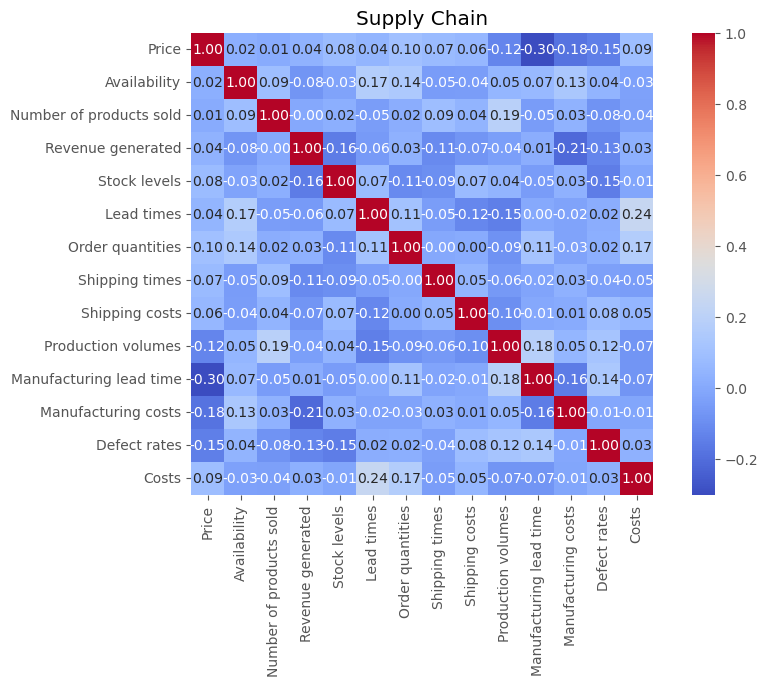

In [993]:
# Create a correlation heatmap
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Supply Chain')
plt.show()